# Analyzing Two Phone Plans

Telecom operator Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. We will analyze clients' behavior and determine which prepaid plan brings in more revenue since Megaline's commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

In this project, we will describe the customers' behavior by finding the minutes, texts, and volume of data the users of each plan require per month. We'll calculate the mean, dispersion, and standard deviation, plot histograms and describe the distributions.

Additionally, we'll form two experiments that will suggest to us the following:  
- Does the average revenue from users of Ultimate and Surf calling plans differs  
- Does the average revenue from users in NY-NJ area is different from that of the users from other regions

# Table of Contents
[1 Open the data file and have a look at the general information](#1heading)  
&emsp;[1.1 Conclusion](#1.1heading)  
[2 Data preprocessing](#2heading)  
&emsp;[2.1 Processing missing values](#2.1heading)  
&emsp;[2.2 Data type replacement](#2.2heading)  
&emsp;[2.3 Processing duplicates](#2.3heading)  
&emsp;[2.4 Eliminating errors in data](#2.4heading)  
&emsp;[2.5 Preparing data - getting revenue per month per user](#2.5heading)  
[3 Analyze the data](#3heading)  
[4 Testing hypotheses](#4heading)  
&emsp;[4.1 The average revenue from users of Ultimate and Surf calling plans differs](#4.1heading)  
&emsp;[4.2 The average revenue from users in NY-NJ area is different from that of the users from other regions](#4.2heading)  
[5 Overall conclusion](#5heading)

<a id='1heading'></a>

## Open the data files and have a look at the general information

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from math import factorial
from scipy import stats as st
from functools import reduce

In [2]:
#Read files
calls_data = pd.read_csv('/Users/AntonioKuri/Desktop/Training/Practicum/Projects/Project 3/megaline_calls.csv')
internet_data = pd.read_csv('/Users/AntonioKuri/Desktop/Training/Practicum/Projects/Project 3/megaline_internet.csv')
messages_data = pd.read_csv('/Users/AntonioKuri/Desktop/Training/Practicum/Projects/Project 3/megaline_messages.csv')
plans_data = pd.read_csv('/Users/AntonioKuri/Desktop/Training/Practicum/Projects/Project 3/megaline_plans.csv')
users_data = pd.read_csv('/Users/AntonioKuri/Desktop/Training/Practicum/Projects/Project 3/megaline_users.csv')

In [3]:
#Check files' first five rows and the data info
print(calls_data.head())
print(calls_data.info())
print('------------------------------------------------------------------------------')
print(internet_data.head())
print(internet_data.info())
print('------------------------------------------------------------------------------')
print(messages_data.head())
print(messages_data.info())
print('------------------------------------------------------------------------------')
print(plans_data.head())
print(plans_data.info())
print('------------------------------------------------------------------------------')
print(users_data.head())
print(users_data.info())

         id  user_id call_date  duration
0   1000_93   1000.0  12/27/18      8.52
1  1000_145   1000.0  12/27/18     13.66
2  1000_247   1000.0  12/27/18     14.48
3  1000_309   1000.0  12/28/18      5.76
4  1000_380   1000.0  12/30/18      4.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137736 entries, 0 to 137735
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  float64
 2   call_date  137735 non-null  object 
 3   duration   137736 non-null  float64
dtypes: float64(2), object(2)
memory usage: 4.2+ MB
None
------------------------------------------------------------------------------
         id  user_id session_date  mb_used
0   1000_13     1000     12/29/18    89.86
1  1000_204     1000     12/31/18     0.00
2  1000_379     1000     12/28/18   660.40
3  1000_413     1000     12/26/18   270.99
4  1000_442     1000     12/27/18   880.22
<cla

<a id='1.1heading'></a>

### Conclusion

1. Calls_data: contains columns (1)id, (2)user_id, (3)call_date, (4)duration with 137735 rows


2. Internet_data: contains columns (1)id, (2)user_id, (3)session_date, (4)mb_used with 104825 rows


3. Messages_data: contains columns (1)id, (2)user_id, (3)message_date with 76051 rows


4. Plans_data: contains columns (1)messages_included, (2)mb_per_month_included, (3)minutes_included, (4)usd_monthly_pay, (5)usd_per_gb, (6)usd_per_message, (7)usd_per_minute, (8)plan_name with 2 rows


5. Users_data: contains columns (1)user_id, (2)first_name, (3)last_name, (4)age, (5)city, (6)reg_date, (7)plan, (8)churn_date with 500 rows

Note: Some data types are not appropriate for the columns - will change in preprocessing stage.

<a id='2heading'></a>

## Data preprocessing

<a id='2.1heading'></a>

### Processing missing values

In [4]:
#Searching for nulls in data
print(calls_data.isnull().sum())
print(internet_data.isnull().sum())
print(messages_data.isnull().sum())
print(plans_data.isnull().sum())
print(users_data.isnull().sum())

id           1
user_id      1
call_date    1
duration     0
dtype: int64
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
id              0
user_id         0
message_date    0
dtype: int64
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


Churn_date under Users_data is the only column with nulls. This is expected and fine as not all users ended their subscription with Megaline.

<a id='2.2heading'></a>

### Data type replacement

In [5]:
#Check calls_data data types
calls_data.dtypes

id            object
user_id      float64
call_date     object
duration     float64
dtype: object

In [6]:
#Minutes rounded up, as one second above 1 minute costs as 2 minutes to the user
calls_data['duration'] = calls_data['duration'].apply(np.ceil)

In [7]:
#Replaceing data type for calls_data file
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'])
calls_data['duration'] = calls_data['duration'].astype(int)

In [8]:
#Recheck calls_data data types
calls_data.dtypes

id                   object
user_id             float64
call_date    datetime64[ns]
duration              int64
dtype: object

---

In [9]:
#Check internet_data data types
internet_data.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

In [10]:
#Replaceing data type for internet_data file
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'])
internet_data['mb_used'] = internet_data['mb_used'].astype(int)

In [11]:
#Recheck internet_data data types
internet_data.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                  int64
dtype: object

---

In [12]:
#Check messages_data data types
messages_data.dtypes

id              object
user_id          int64
message_date    object
dtype: object

In [13]:
#Replaceing data type for messages_data file
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'])

In [14]:
#Recheck messages_data data types
messages_data.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

---

In [15]:
#Check plans_data data types
plans_data.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

Note: plans_data data types are fine

---

In [16]:
#Check users_data data types
users_data.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

In [17]:
#Replaceing data type for users_data file
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'])
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'])

In [18]:
#Recheck users_data data types
users_data.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

Our dataframes now have the correct data types.

<a id='2.3heading'></a>

### Processing duplicates

In [19]:
#Count total duplicates for calls_data
print('Total duplicates:', calls_data.duplicated().sum())

Total duplicates: 0


In [20]:
#Count total duplicates internet_data
print('Total duplicates:', internet_data.duplicated().sum())

Total duplicates: 0


In [21]:
#Count total duplicates messages_data
print('Total duplicates:', messages_data.duplicated().sum())

Total duplicates: 0


In [22]:
#Count total duplicates users_data
print('Total duplicates:', users_data.duplicated().sum())

Total duplicates: 0


Note: plans_data only has 2 rows, so we didn't check for duplicates.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
Well done! 
</div>

<a id='2.4heading'></a>

### Eliminating errors in data

In [23]:
#Calls made with 0 minutes - they're probably missed calls
calls_data_zero_min = calls_data.query('duration == 0')
print('Total rows with 0 minutes:', len(calls_data_zero_min))
print('Total rows:', len(calls_data))
print('Proportion of rows with 0 minutes to all calls:', len(calls_data_zero_min)/len(calls_data))

Total rows with 0 minutes: 26834
Total rows: 137736
Proportion of rows with 0 minutes to all calls: 0.1948219782772841


20% of calls were missed calls. We need to delete them because they don't count as consumed minutes by the customers. This will not affect our analysis.

In [24]:
#Deleting rows with 0 minutes and confirming deletion
calls_data = calls_data.query('duration != 0')
print('Total rows:', len(calls_data))

Total rows: 110902


In [25]:
#mb_used made with value 0 - this could be days in which users turned internet data on and off instantaneously
internet_data_zero_min = internet_data.query('mb_used == 0')
print('Total rows with 0 mb_used:', len(internet_data_zero_min))
print('Total rows:', len(internet_data))
print('Proportion of rows with 0 minutes to all calls:', len(internet_data_zero_min)/len(internet_data))

Total rows with 0 mb_used: 13829
Total rows: 104825
Proportion of rows with 0 minutes to all calls: 0.13192463629859288


13% of entries of internet_data have value 0 for mb_used. We need to delete them because they don't count as consumed mb by the customers. This will not affect our analysis.

In [26]:
#Deleting rows with 0 mb_used and confirming deletion
internet_data = internet_data.query('mb_used != 0')
print('Total rows:', len(internet_data))

Total rows: 90996


<a id='2.5heading'></a>

### Preparing data - getting revenue per month per user

In this step, we will get the revenue per month per user. We'll do this by itemizing every user's monthly consumption of minutes, messages and internet. We'll subtract by the plan's included amount of minutes, messages and internet. Then we'll multiply the overused minutes, messages and internet by the rates of over consumption and finally add the plan's monthly price. With this process, we'll arrive at the monthly revenue per user per month.

In [27]:
#In calls_data, adding column stating the month calls were made
calls_data['month'] = calls_data['call_date'].dt.month

In [28]:
#For each user, finding the number of calls made and minutes used per month
calls_data_revenue = calls_data.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_data_revenue.head()

count      sum
              duration duration
user_id month                  
1000.0  12.0        16      124
1001.0  8.0         22      182
        9.0         38      315
        10.0        47      393
        11.0        49      426

In [29]:
calls_data_revenue.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2256 entries, (1000.0, 12.0) to (1499.0, 12.0)
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   (count, duration)  2256 non-null   int64
 1   (sum, duration)    2256 non-null   int64
dtypes: int64(2)
memory usage: 45.8 KB


In [30]:
#In messages_data, adding column stating the month messages were sent
messages_data['month'] = messages_data['message_date'].dt.month

In [31]:
#For each user, finding the number of text messages sent per month
messages_data_revenue = messages_data.pivot_table(index=['user_id', 'month'], values='id' , aggfunc=['count'])
messages_data_revenue.head()

count
                 id
user_id month      
1000    12       11
1001    8        30
        9        44
        10       53
        11       36

In [32]:
messages_data_revenue.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1806 entries, (1000, 12) to (1497, 12)
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   (count, id)  1806 non-null   int64
dtypes: int64(1)
memory usage: 22.7 KB


In [33]:
#In internet_data, adding column stating month internet sessions were made
internet_data['month'] = internet_data['session_date'].dt.month

In [34]:
#For each user, finding the volume of data per month
internet_data_revenue = internet_data.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
internet_data_revenue.head()

sum
              mb_used
user_id month        
1000    12       1899
1001    8        6908
        9       13294
        10      22308
        11      18477

In [35]:
internet_data_revenue.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2277 entries, (1000, 12) to (1499, 12)
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   (sum, mb_used)  2277 non-null   int64
dtypes: int64(1)
memory usage: 28.5 KB


In [36]:
#Merge three tables to find common overlapping user_ids with month
data_frames = [calls_data_revenue, messages_data_revenue, internet_data_revenue]
overall_revenue = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)
overall_revenue.info()
overall_revenue.tail()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2293 entries, (1000.0, 12.0) to (1311.0, 6.0)
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (count, duration)  2256 non-null   float64
 1   (sum, duration)    2256 non-null   float64
 2   (count, id)        1806 non-null   float64
 3   (sum, mb_used)     2277 non-null   float64
dtypes: float64(4)
memory usage: 102.7 KB


,,count,sum,count,sum
,,duration,duration,id,mb_used
user_id,month,,,,
1407.0,11.0,NaN,NaN,1.0,290.0
1482.0,10.0,NaN,NaN,2.0,NaN
1094.0,10.0,NaN,NaN,NaN,1727.0
1108.0,12.0,NaN,NaN,NaN,233.0
1311.0,6.0,NaN,NaN,NaN,1494.0


In [37]:
#Rename columns
overall_revenue.columns = ['calls_made', 'minutes_used', 'messages_sent', 'mb_used']
overall_revenue.tail()

,,calls_made,minutes_used,messages_sent,mb_used
user_id,month,,,,
1407.0,11.0,NaN,NaN,1.0,290.0
1482.0,10.0,NaN,NaN,2.0,NaN
1094.0,10.0,NaN,NaN,NaN,1727.0
1108.0,12.0,NaN,NaN,NaN,233.0
1311.0,6.0,NaN,NaN,NaN,1494.0


In [38]:
#Get additional information needed into our overall_revenue dataframe
overall_revenue = overall_revenue.merge(users_data, on='user_id', how = 'left')
overall_revenue.tail()

,user_id,calls_made,minutes_used,messages_sent,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date
2288,1407.0,NaN,NaN,1.0,290.0,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT
2289,1482.0,NaN,NaN,2.0,NaN,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaT
2290,1094.0,NaN,NaN,NaN,1727.0,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12
2291,1108.0,NaN,NaN,NaN,233.0,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaT
2292,1311.0,NaN,NaN,NaN,1494.0,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaT


In [39]:
del overall_revenue['first_name']
del overall_revenue['last_name']
del overall_revenue['age']
del overall_revenue['reg_date']
del overall_revenue['churn_date']
overall_revenue.head(1)

,user_id,calls_made,minutes_used,messages_sent,mb_used,city,plan
0,1000.0,16.0,124.0,11.0,1899.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate


In [40]:
#Make plan_minutes column
overall_revenue['plan_minutes'] = overall_revenue['plan']
overall_revenue['plan_minutes'] = overall_revenue['plan_minutes'].replace('surf', 500)
overall_revenue['plan_minutes'] = overall_revenue['plan_minutes'].replace('ultimate', 3000)
overall_revenue.head(1)

,user_id,calls_made,minutes_used,messages_sent,mb_used,city,plan,plan_minutes
0,1000.0,16.0,124.0,11.0,1899.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000


In [41]:
#Make plan_messages column
overall_revenue['plan_messages'] = overall_revenue['plan']
overall_revenue['plan_messages'] = overall_revenue['plan_messages'].replace('surf', 50)
overall_revenue['plan_messages'] = overall_revenue['plan_messages'].replace('ultimate', 1000)
overall_revenue.head(1)

,user_id,calls_made,minutes_used,messages_sent,mb_used,city,plan,plan_minutes,plan_messages
0,1000.0,16.0,124.0,11.0,1899.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,1000


In [42]:
#Make plan_internet_mb column
overall_revenue['plan_mb'] = overall_revenue['plan']
overall_revenue['plan_mb'] = overall_revenue['plan_mb'].replace('surf', 15360)
overall_revenue['plan_mb'] = overall_revenue['plan_mb'].replace('ultimate', 30720)
overall_revenue.head(1)

,user_id,calls_made,minutes_used,messages_sent,mb_used,city,plan,plan_minutes,plan_messages,plan_mb
0,1000.0,16.0,124.0,11.0,1899.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,1000,30720


In [43]:
#Make nulls into 0 - these fills months in which users didn't consume
overall_revenue.fillna(value=0, inplace=True)

In [44]:
#Change float data types to int
overall_revenue['calls_made'] = overall_revenue['calls_made'].astype(int)
overall_revenue['minutes_used'] = overall_revenue['minutes_used'].astype(int)
overall_revenue['messages_sent'] = overall_revenue['messages_sent'].astype(int)
overall_revenue['mb_used'] = overall_revenue['mb_used'].astype(int)

In [45]:
#Make minutes_overused column, convert negative numbers to 0
overall_revenue['minutes_overused'] = overall_revenue['minutes_used'] - overall_revenue['plan_minutes']
overall_revenue['minutes_overused'] = overall_revenue['minutes_overused'].apply(lambda x: '0' if x < 0 else x)
overall_revenue['minutes_overused'] = overall_revenue['minutes_overused'].astype(int)
overall_revenue.tail(1)

,user_id,calls_made,minutes_used,messages_sent,mb_used,city,plan,plan_minutes,plan_messages,plan_mb,minutes_overused
2292,1311.0,0,0,0,1494,"Memphis, TN-MS-AR MSA",ultimate,3000,1000,30720,0


In [46]:
#Make messages_overused column, convert negative numbers to 0
overall_revenue['messages_overused'] = overall_revenue['messages_sent'] - overall_revenue['plan_messages']
overall_revenue['messages_overused'] = overall_revenue['messages_overused'].apply(lambda x: '0' if x < 0 else x)
overall_revenue['messages_overused'] = overall_revenue['messages_overused'].astype(int)
overall_revenue.head(1)

,user_id,calls_made,minutes_used,messages_sent,mb_used,city,plan,plan_minutes,plan_messages,plan_mb,minutes_overused,messages_overused
0,1000.0,16,124,11,1899,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,1000,30720,0,0


In [47]:
#Make mb_overused column, convert negative numbers to 0
overall_revenue['mb_overused'] = overall_revenue['mb_used'] - overall_revenue['plan_mb']
overall_revenue['mb_overused'] = overall_revenue['mb_overused'].apply(lambda x: '0' if x < 0 else x)
overall_revenue['mb_overused'] = overall_revenue['mb_overused'].astype(int)
overall_revenue.head(1)

,user_id,calls_made,minutes_used,messages_sent,mb_used,city,plan,plan_minutes,plan_messages,plan_mb,minutes_overused,messages_overused,mb_overused
0,1000.0,16,124,11,1899,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,1000,30720,0,0,0


In [48]:
#Add column converting mb to gb because Megaline does analysis in gb metric
overall_revenue['gb_overused'] = overall_revenue['mb_overused']/1024
overall_revenue['gb_overused'] = overall_revenue['gb_overused'].apply(np.ceil)
overall_revenue['gb_overused'] = overall_revenue['gb_overused'].astype(int)
overall_revenue.head(1)

,user_id,calls_made,minutes_used,messages_sent,mb_used,city,plan,plan_minutes,plan_messages,plan_mb,minutes_overused,messages_overused,mb_overused,gb_overused
0,1000.0,16,124,11,1899,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,1000,30720,0,0,0,0


In [49]:
#Adding column usd_per_minute
overall_revenue['usd_per_minute'] = overall_revenue['plan']
overall_revenue['usd_per_minute'] = overall_revenue['usd_per_minute'].replace('surf', 0.03)
overall_revenue['usd_per_minute'] = overall_revenue['usd_per_minute'].replace('ultimate', 0.01)
#Adding column usd_per_message
overall_revenue['usd_per_message'] = overall_revenue['plan']
overall_revenue['usd_per_message'] = overall_revenue['usd_per_message'].replace('surf', 0.03)
overall_revenue['usd_per_message'] = overall_revenue['usd_per_message'].replace('ultimate', 0.01)
#Adding column usd_per_gb
overall_revenue['usd_per_gb'] = overall_revenue['plan']
overall_revenue['usd_per_gb'] = overall_revenue['usd_per_gb'].replace('surf', 10)
overall_revenue['usd_per_gb'] = overall_revenue['usd_per_gb'].replace('ultimate', 7)
overall_revenue.head(1)

,user_id,calls_made,minutes_used,messages_sent,mb_used,city,plan,plan_minutes,plan_messages,plan_mb,minutes_overused,messages_overused,mb_overused,gb_overused,usd_per_minute,usd_per_message,usd_per_gb
0,1000.0,16,124,11,1899,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,1000,30720,0,0,0,0,0.01,0.01,7


In [50]:
#Adding column calls_revenue
overall_revenue['calls_revenue'] = overall_revenue['minutes_overused']*overall_revenue['usd_per_minute']
#Adding column messages_revenue
overall_revenue['messages_revenue'] = overall_revenue['messages_overused']*overall_revenue['usd_per_message']
#Adding column internet_revenue
overall_revenue['internet_revenue'] = overall_revenue['gb_overused']*overall_revenue['usd_per_gb']
#Adding column plan_cost_revenue
overall_revenue['plan_cost_revenue'] = overall_revenue['plan']
overall_revenue['plan_cost_revenue'] = overall_revenue['plan_cost_revenue'].replace('surf', 20)
overall_revenue['plan_cost_revenue'] = overall_revenue['plan_cost_revenue'].replace('ultimate', 70)
#Adding column total_revenue
overall_revenue ['total_revenue'] = overall_revenue['calls_revenue']+overall_revenue['messages_revenue']+overall_revenue['internet_revenue']+overall_revenue['plan_cost_revenue']

In [51]:
overall_revenue.head()

,user_id,calls_made,minutes_used,messages_sent,mb_used,city,plan,plan_minutes,plan_messages,plan_mb,...,mb_overused,gb_overused,usd_per_minute,usd_per_message,usd_per_gb,calls_revenue,messages_revenue,internet_revenue,plan_cost_revenue,total_revenue
0,1000.0,16,124,11,1899,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,3000,1000,30720,...,0,0,0.01,0.01,7,0.0,0.00,0,70,70.00
1,1001.0,22,182,30,6908,"Seattle-Tacoma-Bellevue, WA MSA",surf,500,50,15360,...,0,0,0.03,0.03,10,0.0,0.00,0,20,20.00
2,1001.0,38,315,44,13294,"Seattle-Tacoma-Bellevue, WA MSA",surf,500,50,15360,...,0,0,0.03,0.03,10,0.0,0.00,0,20,20.00
3,1001.0,47,393,53,22308,"Seattle-Tacoma-Bellevue, WA MSA",surf,500,50,15360,...,6948,7,0.03,0.03,10,0.0,0.09,70,20,90.09
4,1001.0,49,426,36,18477,"Seattle-Tacoma-Bellevue, WA MSA",surf,500,50,15360,...,3117,4,0.03,0.03,10,0.0,0.00,40,20,60.00


This dataframe contains the revenue per customer per month for overlapping user_ids and months in the calls_data, messages_data, and internet_data files 

<a id='3heading'></a>

## Analyze the data

In this section, we'll describe the customers' behavior by finding the minutes, texts, and volume of data the users of each plan require per month. We'll Calculate the mean, dispersion, and standard deviation. We'll additionally Plot histograms and describe the distributions.

In [52]:
#Convert mb_used column to gb_used - Megaline does analysis in gb
overall_revenue['mb_used'] = overall_revenue['mb_used']/1024
overall_revenue['mb_used'] = overall_revenue['mb_used'].apply(np.ceil)
overall_revenue['mb_used'] = overall_revenue['mb_used'].astype(int)
overall_revenue.rename(columns={'mb_used':'gb_used'}, inplace=True)

In [53]:
#Make dataframe with only Surf users
overall_revenue_surf = overall_revenue.query('plan == "surf"')

In [54]:
#Make dataframe with only Ultimate users
overall_revenue_ultimate = overall_revenue.query('plan == "ultimate"')

<h6><center>Minutes_used</center></h6>

In [55]:
#Getting days_listed standard deviation
minutes_used_std_dev = np.std(overall_revenue_surf['minutes_used'])
print('Minutes_used standard deviation:',minutes_used_std_dev)

Minutes_used standard deviation: 234.37861376695076


In [56]:
#Getting limit for std dev above and below
overall_revenue_surf__2std_below_limit = overall_revenue_surf['minutes_used'].mean() - minutes_used_std_dev*2
overall_revenue_surf__1std_below_limit = overall_revenue_surf['minutes_used'].mean() - minutes_used_std_dev
overall_revenue_surf__1std_above_limit = overall_revenue_surf['minutes_used'].mean() + minutes_used_std_dev
overall_revenue_surf__2std_above_limit = overall_revenue_surf['minutes_used'].mean() + minutes_used_std_dev*2
print('Minutes_used')
print('2 Std Dev lower limit:', overall_revenue_surf__2std_below_limit)
print('1 Std Dev lower limit:', overall_revenue_surf__1std_below_limit)
print('1 Std Dev upper limit:', overall_revenue_surf__1std_above_limit)
print('2 Std Dev upper limit:', overall_revenue_surf__2std_above_limit)

Minutes_used
2 Std Dev lower limit: -40.00770432983285
1 Std Dev lower limit: 194.37090943711792
1 Std Dev upper limit: 663.1281369710194
2 Std Dev upper limit: 897.5067507379702


Since the distribution has a lower bound at 2, but no upper bound, it is skewwed right. In this case the empirical rule to use standard deviations to set lower and upper bounds for further analysis does not apply. Since all other histograms are skewwed right, will not use std devs to remove outliers.

In [57]:
#Figuring out minutes_used upper limit for Surf
Q1 = overall_revenue_surf['minutes_used'].quantile(0.25)
Q3 = overall_revenue_surf['minutes_used'].quantile(0.75)
IQR = Q3 - Q1
minutes_used_lower_outliers = Q1-1.5*IQR
minutes_used_upper_outliers = Q3+1.5*IQR
print('Surf minutes_used upper limit:', minutes_used_lower_outliers)
print('Surf minutes_used upper limit:', minutes_used_upper_outliers)

Surf minutes_used upper limit: -184.0
Surf minutes_used upper limit: 1032.0


In [58]:
#Figuring out minutes_used upper limit for Ultimate
Q1 = overall_revenue_ultimate['minutes_used'].quantile(0.25)
Q3 = overall_revenue_ultimate['minutes_used'].quantile(0.75)
IQR = Q3 - Q1
minutes_used_lower_outliers = Q1-1.5*IQR
minutes_used_upper_outliers = Q3+1.5*IQR
print('Ultimate minutes_used upper limit:', minutes_used_lower_outliers)
print('Ultimate minutes_used upper limit:', minutes_used_upper_outliers)

Ultimate minutes_used upper limit: -197.875
Ultimate minutes_used upper limit: 1023.125


In [59]:
#Removing outliers
overall_revenue_surf_minutes_used_clean = overall_revenue_surf.query('minutes_used <= 1032.0')
overall_revenue_ultimate_minutes_used_clean = overall_revenue_ultimate.query('minutes_used <= 1023.125')

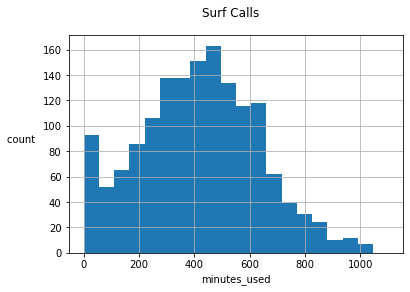

count    1545.000000
mean      415.882848
std       215.536023
min         0.000000
25%       266.000000
50%       418.000000
75%       565.000000
max      1029.000000
Name: minutes_used, dtype: float64

In [60]:
#Histogram for Surf minutes_used
overall_revenue_surf_minutes_used_clean['minutes_used'].hist(bins=20, range=(0,1100), label='minutes_used')
plt.suptitle('Surf Calls')
plt.xlabel('minutes_used')
plt.ylabel('count           ', rotation=0)
plt.show()
overall_revenue_surf_minutes_used_clean['minutes_used'].describe()

In [61]:
np.var(overall_revenue_surf_minutes_used_clean['minutes_used'])

46425.708605481836

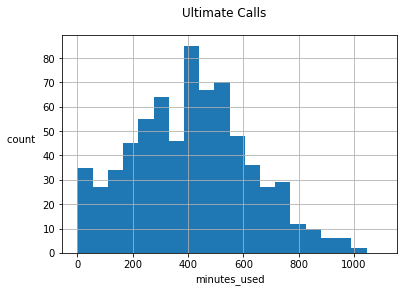

count     704.000000
mean      413.512784
std       214.560200
min         0.000000
25%       257.500000
50%       419.500000
75%       548.500000
max      1020.000000
Name: minutes_used, dtype: float64

In [62]:
#Histogram for Ultimate minutes_used
overall_revenue_ultimate_minutes_used_clean['minutes_used'].hist(bins=20, range=(0,1100))
plt.suptitle('Ultimate Calls')
plt.xlabel('minutes_used')
plt.ylabel('count           ', rotation=0)
plt.show()
overall_revenue_ultimate_minutes_used_clean['minutes_used'].describe()

In [63]:
np.var(overall_revenue_ultimate_minutes_used_clean['minutes_used'])

45970.68733656704

The distributions for minutes_used for both plans are similar.

The variance for both plans is almost the same.

The mean is only 2 minutes smaller for Ultimate; not a drastric difference.

The quartiles are very similar with no more than the 27 minute difference found in the 3rd quartile.

Note that more than 25% of Surf users use more than the 500 minute plan limit. Very rarely does any Ultimate user surpass the 1000 minute plan limit.


<h6><center>Messages_sent</center></h6>

In [64]:
#Figuring out messages_sent upper limit for Surf
Q1 = overall_revenue_surf['messages_sent'].quantile(0.25)
Q3 = overall_revenue_surf['messages_sent'].quantile(0.75)
IQR = Q3 - Q1
messages_sent_lower_outliers = Q1-1.5*IQR
messages_sent_upper_outliers = Q3+1.5*IQR
print('Surf messages_sent upper limit:', messages_sent_lower_outliers)
print('Surf Messages_sent upper limit:', messages_sent_upper_outliers)

Surf messages_sent upper limit: -63.0
Surf Messages_sent upper limit: 113.0


In [65]:
#Figuring out messages_sent upper limit for Ultimate
Q1 = overall_revenue_ultimate['messages_sent'].quantile(0.25)
Q3 = overall_revenue_ultimate['messages_sent'].quantile(0.75)
IQR = Q3 - Q1
messages_sent_lower_outliers = Q1-1.5*IQR
messages_sent_upper_outliers = Q3+1.5*IQR
print('Ultimate messages_sent upper limit:', messages_sent_lower_outliers)
print('Ultimate Messages_sent upper limit:', messages_sent_upper_outliers)

Ultimate messages_sent upper limit: -74.0
Ultimate Messages_sent upper limit: 142.0


In [66]:
#Removing outliers
overall_revenue_surf_messages_sent_clean = overall_revenue_surf.query('messages_sent <= 113.0')
overall_revenue_ultimate_messages_sent_clean = overall_revenue_ultimate.query('messages_sent <= 142.0')

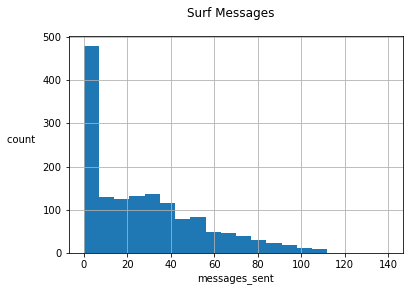

count    1522.000000
mean       27.473062
std        26.865572
min         0.000000
25%         2.000000
50%        23.000000
75%        43.000000
max       112.000000
Name: messages_sent, dtype: float64

In [67]:
#Histogram for Surf messages_sent
overall_revenue_surf_messages_sent_clean['messages_sent'].hist(bins=20, range=(0,140))
plt.suptitle('Surf Messages')
plt.xlabel('messages_sent')
plt.ylabel('count           ', rotation=0)
plt.show()
overall_revenue_surf_messages_sent_clean['messages_sent'].describe()

In [68]:
np.var(overall_revenue_surf_messages_sent_clean['messages_sent'])

721.2847539633349

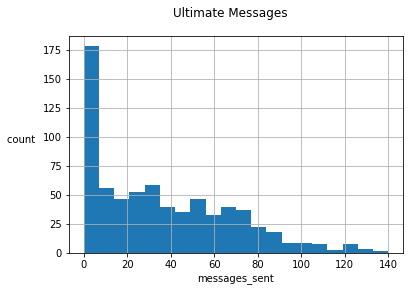

count    710.000000
mean      35.947887
std       32.248355
min        0.000000
25%        6.250000
50%       30.000000
75%       59.000000
max      139.000000
Name: messages_sent, dtype: float64

In [69]:
#Histogram for Ultimate messages_sent
overall_revenue_ultimate_messages_sent_clean['messages_sent'].hist(bins=20, range=(0,140))
plt.suptitle('Ultimate Messages')
plt.xlabel('messages_sent')
plt.ylabel('count           ', rotation=0)
plt.show()
overall_revenue_ultimate_messages_sent_clean['messages_sent'].describe()

In [70]:
np.var(overall_revenue_ultimate_messages_sent_clean['messages_sent'])

1038.4916504661821

The standard deviation and variance for Ultimate are larger.

The interquartile range for Ultimate is larger as well. This means that the typical Surf user does indeed send substantially less messages than the typical Ultimate user.

A little less than 25% of Surf users send more than the 50 messages limit.
There are no Ultimate users that get close to the 1000 messages limit; max is 139.

<h6><center>Gb_used</center></h6>

In [71]:
#Figuring out gb_used upper limit for Surf
Q1 = overall_revenue_surf['gb_used'].quantile(0.25)
Q3 = overall_revenue_surf['gb_used'].quantile(0.75)
IQR = Q3 - Q1
gb_used_lower_outliers = Q1-1.5*IQR
gb_used_upper_outliers = Q3+1.5*IQR
print('Price upper limit:', gb_used_lower_outliers)
print('Price upper limit:', gb_used_upper_outliers)

Price upper limit: -1.5
Price upper limit: 34.5


In [72]:
#Figuring out gb_used upper limit for Ultimate
Q1 = overall_revenue_ultimate['gb_used'].quantile(0.25)
Q3 = overall_revenue_ultimate['gb_used'].quantile(0.75)
IQR = Q3 - Q1
gb_used_lower_outliers = Q1-1.5*IQR
gb_used_upper_outliers = Q3+1.5*IQR
print('Price upper limit:', gb_used_lower_outliers)
print('Price upper limit:', gb_used_upper_outliers)

Price upper limit: 1.0
Price upper limit: 33.0


In [73]:
#Removing outliers
overall_revenue_surf_gb_used_clean = overall_revenue_surf.query('gb_used <= 34.5')
overall_revenue_ultimate_gb_used_clean = overall_revenue_ultimate.query('gb_used <= 33.0')

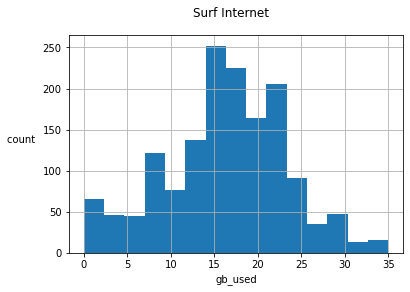

count    1539.000000
mean       16.121507
std         6.957435
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        34.000000
Name: gb_used, dtype: float64

In [74]:
#Histogram for Surf messages_sent
overall_revenue_surf_gb_used_clean['gb_used'].hist(bins=15, range=(0,35))
plt.suptitle('Surf Internet')
plt.xlabel('gb_used')
plt.ylabel('count           ', rotation=0)
plt.show()
overall_revenue_surf_gb_used_clean['gb_used'].describe()

In [75]:
np.var(overall_revenue_surf_gb_used_clean['gb_used'])

48.37444970933344

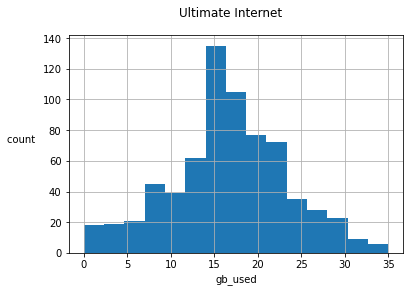

count    694.000000
mean      16.515850
std        6.638395
min        0.000000
25%       13.000000
50%       17.000000
75%       20.000000
max       33.000000
Name: gb_used, dtype: float64

In [76]:
#Histogram for Ultimate messages_sent
overall_revenue_ultimate_gb_used_clean['gb_used'].hist(bins=15, range=(0,35))
plt.suptitle('Ultimate Internet')
plt.xlabel('gb_used')
plt.ylabel('count           ', rotation=0)
plt.show()
overall_revenue_ultimate_gb_used_clean['gb_used'].describe()

In [77]:
np.var(overall_revenue_ultimate_gb_used_clean['gb_used'])

44.00479200059782

Both histograms have almost equal quartiles and a very similar standard deviation and variance. Surf's standard deviation and variance are bigger. Moreover, the mean for Ultimate is less than 0.5gb larger. Customer behavior for both plans is virtually identical.

Customers on both plans seem to consume on average around 17gb per month. Note that Surf includes 15gb of internet and Ultimate includes 30gb. Surf customers usually consume more than the plan's included internet, and Ultimate customers rarely ever surpass the 30gb limit.

<a id='4heading'></a>

## Testing hypotheses


<a id='4.1heading'></a>

### The average revenue from users of Ultimate and Surf calling plans differs

In [78]:
print('Surf total revenue mean:', overall_revenue_surf['total_revenue'].mean())
print('Ultimate total revenue mean:', overall_revenue_ultimate['total_revenue'].mean())

Surf total revenue mean: 60.57290527654157
Ultimate total revenue mean: 72.29444444444445


<ins>Experiment<ins/>

Null Hypothesis H0: Average revenue from users of Ultimate and Surf plans is the same
    
Alternative Hypothesis H1: Average revenue from users of Ultimate and Surf plans differs

In [79]:
#Experiment

alpha = 0.05 #set a critical statistical significance level

results = st.ttest_ind(overall_revenue_surf['total_revenue'], overall_revenue_ultimate['total_revenue'], equal_var = False) # test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue) #print the p-value

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.4423080832743438e-15
We reject the null hypothesis


We've used the Hypothesis on the Equality of Two Population Means because we need to compare the means of two different statistical populations.

Our analysis suggests that revenue from users of Ultimate and Surf calling plans does differ because the p-value is such a miniscule amount lower than our 0.05 significance level.

We set the significance level at 0.05 because that level indicates a 5% risk of concluding that a difference exists when there is no actual difference. This level has been traditionally used in statistics. Additionally, we've set equal_var as False because the variances of both columns are not equal to each other.

<a id='4.2heading'></a>

### The average revenue from users in NY-NJ area is different from that of the users from other regions

In [80]:
#Getting dataframe with NY-NJ area users
overall_revenue_NYNJ = overall_revenue[overall_revenue['city'].str.contains(pat='(ny)|(nj)', case=False)]
overall_revenue_NYNJ['city'].value_counts()

/Users/AntonioKuri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


New York-Newark-Jersey City, NY-NJ-PA MSA          377
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
San Jose-Sunnyvale-Santa Clara, CA MSA              31
Rochester, NY MSA                                   15
Buffalo-Cheektowaga, NY MSA                          9
Albany-Schenectady-Troy, NY MSA                      5
Name: city, dtype: int64

In [81]:
#Removing CA city
overall_revenue_NYNJ = overall_revenue_NYNJ.query('city != "San Jose-Sunnyvale-Santa Clara, CA MSA"')
overall_revenue_NYNJ['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          377
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
Rochester, NY MSA                                   15
Buffalo-Cheektowaga, NY MSA                          9
Albany-Schenectady-Troy, NY MSA                      5
Name: city, dtype: int64

In [82]:
#Getting dataframe without NY-NJ area users
overall_revenue_other = overall_revenue.query('city not in ("New York-Newark-Jersey City, NY-NJ-PA MSA", "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA", "Buffalo-Cheektowaga, NY MSA", "Rochester, NY MSA", "Albany-Schenectady-Troy, NY MSA")')

In [83]:
print('Surf total revenue mean:', overall_revenue_NYNJ['total_revenue'].mean())
print('Ultimate total revenue mean:', overall_revenue_other['total_revenue'].mean())

Surf total revenue mean: 61.24254098360657
Ultimate total revenue mean: 65.06749030470911


<ins>Experiment<ins/>

Null Hypothesis H0: Average revenue from users in NY-NJ is the same from that of the users from other regions
    
Alternative Hypothesis H1: Average revenue from users in NY-NJ is different from that of the users from other regions

In [84]:
#Experiment

alpha = 0.05 #set a critical statistical significance level

results = st.ttest_ind(overall_revenue_NYNJ['total_revenue'], overall_revenue_other['total_revenue'], equal_var = False) #test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue) #print the p-value

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.1035007419789405
We can't reject the null hypothesis


We've used the Hypothesis on the Equality of Two Population Means because we need to compare the means of two different statistical populations.

Our analysis suggests that revenue from users of the NY-NJ is the same from other regions because the p-value is larger than our 0.05 significance level.

We set the significance level at 0.05 because that level indicates a 5% risk of concluding that a difference exists when there is no actual difference. This level has been traditionally used in statistics. Additionally, we've set equal_var as False because the variances of both columns are not equal to each other.

<a id='5heading'></a>

## Overall conclusion

We got our monthly total revenue per customer by first itemizing every month a user held a Megaline plan, and determining how many minutes, messages, and gigabytes they consumed per month. We then established the overuse of minutes, messages, and gigabytes, and mulitplied them by the overuse rates depending on the plan. Finally, we aggregated the overuse revenue and added it by the monthly plan price to get calculate every customer's monthly revenue.

We examined the distributions for monthly minutes used, messages sent, and gigabytes used and concluded that Surf users tend to overuse their plan limits on the three categories. However, Ultimate users don't tend to pass their limit on any category; Ultimate users rarely ever used 10% or more of their messages limit. Ultimate users did tend to use more of the three categories, but not by a drastic difference compared to Surf users. Internet usage was virtually identical for both plans.

We can conclude from the extensive analysis done that the Ultimate plan brings in more revenue to Megaline than the Surf plan. Ultimate brings in an average revenue of 72 dollars per customer while Surf brings in an average of 60 dollars per customer.

We've seen from our experiments in step 4.1 that the difference in average revenue per customer between both plans is most likely not due to random chance. The analysis suggests that the plans' different offerings are what leads to the difference in revenue, because we assume that customers choose their Megaline plan based on the behaviors they assume they'll undertake (e.g. how many minutes they call, how many messages they send, etc.). Our analysis in step 4.2 suggests that revenue from users of the NY-NJ is the same from other regions.